<a href="https://colab.research.google.com/github/ao2395/Financial-Analysis-Tool/blob/main/finanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
from google.colab import userdata
key=userdata.get('key')
if key:
    print("TwelveData API key retrieved successfully!")
else:
    print("Failed to retrieve Twelve Data API key. Please check your setup.")
key2=userdata.get('key2')
if key2:
    print("FMP API key is set!")
else:
    print("Failed to set FMP API key. Please check your setup.")
# this function is used to install and import the python packages that we are going to use for the project
def install_and_import(package):
    import importlib
    try:
        importlib.import_module(package)
    except ImportError:
        import pip
        pip.main(['install', package])
    finally:
        globals()[package] = importlib.import_module(package)


install_and_import('mplfinance')

# User Input is required to analyze different companies using their Ticker and interval
ticker = input('Enter ticker: ')
interval = input('Enter interval: ')

# we are using twelve data API to fetch the data then we are cleaning the data and creating the charts and other metrics used for the financial analysis
url = f'https://api.twelvedata.com/time_series?symbol={ticker}&start_date=2023-01-01&end_date=2024-01-01&interval={interval}&outputsize=12&apikey={key}'

data_raw = requests.get(url).json()

TwelveData API key retrieved successfully!
FMP API key is set!


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting mplfinance

Downloading mplfinance-0.12.10b0-py3-none-any.whl.metadata (19 kB)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from mplfinance) (3.7.1)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from mplfinance) (2.1.4)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.3.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (4.53.1)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.4.7)

Requirement already satisfied: numpy>=1.20 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.26.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (24.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (9.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (3.1.4)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->mplfinance) (2024.1)

Requirement already satisfied: tzdata>=2022.1 in /usr/local/lib/python3.10/dist-packages (from pandas->mplfinance) (2024.1)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib->mplfinance) (1.16.0)

Downloading mplfinance-0.12.10b0-py3-none-any.whl (75 kB)

Output()

Installing collected packages: mplfinance

Successfully installed mplfinance-0.12.10b0

Enter ticker: AAPL
Enter interval: 1day


In [2]:
url_profile = f'https://api.twelvedata.com/profile?symbol={ticker}&apikey={key}'
profile_raw = requests.get(url_profile).json()


In [3]:
# this cell is used to clear the json format to make the company profile more human readable

print("Company Profile:")
print(f"Symbol: {profile_raw['symbol']}")
print(f"Name: {profile_raw['name']}")
print(f"Industry: {profile_raw['industry']} | Sector: {profile_raw['sector']}")
print(f"Exchange: {profile_raw['exchange']} (MIC Code: {profile_raw['mic_code']})")
print(f"Employees: {profile_raw['employees']}")
print(f"Website: {profile_raw['website']}\n")

print("Description:")
print(profile_raw['description'] + "\n")

print("CEO Information:")
print(f"CEO: {profile_raw['CEO']}\n")

print("Contact Information:")
print(f"Address: {profile_raw['address']}, {profile_raw['city']}, {profile_raw['state']} {profile_raw['zip']}, {profile_raw['country']}")
print(f"Phone: {profile_raw['phone']}")

Company Profile:
Symbol: AAPL
Name: Apple Inc
Industry: Consumer Electronics | Sector: Technology
Exchange: NASDAQ (MIC Code: XNGS)
Employees: 161000
Website: https://www.apple.com

Description:
Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening expe

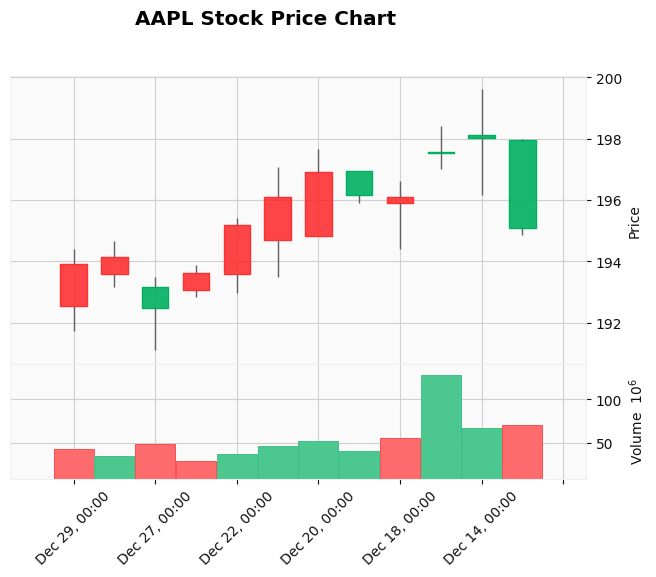

In [4]:
# in this cell we are using MPLfinance package which is great to produce the financial charts and we are creating the candlestick chart by utilizing the
# data we gathered using the API
data = pd.DataFrame(data_raw['values'])
data['datetime'] = pd.to_datetime(data['datetime'])
data[['open', 'high', 'low', 'close', 'volume']] = data[['open', 'high', 'low', 'close', 'volume']].astype(float)
data.set_index('datetime', inplace=True)
mplfinance.plot(data, type='candle', volume=True, title=f"{data_raw['meta']['symbol']} Stock Price Chart", style='yahoo')

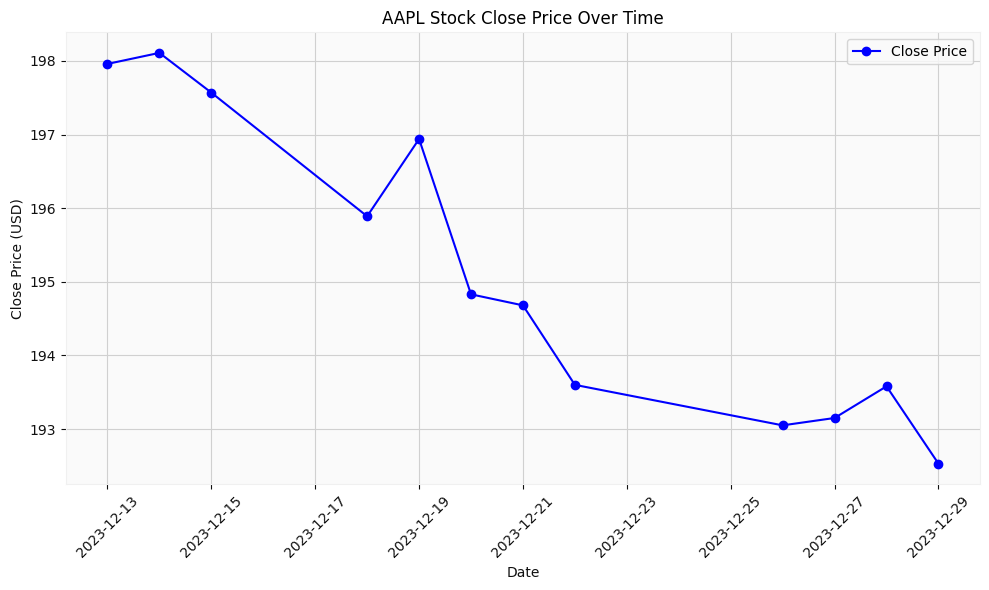

In [5]:
data = pd.DataFrame(data_raw['values'])
data['datetime'] = pd.to_datetime(data['datetime'])
data[['open', 'high', 'low', 'close', 'volume']] = data[['open', 'high', 'low', 'close', 'volume']].astype(float)

# Plot the line chart for 'close' prices over time
plt.figure(figsize=(10,6))
plt.plot(data['datetime'], data['close'], label='Close Price', color='blue', marker='o')

# Adding labels and title to the price chart
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title(f"{data_raw['meta']['symbol']} Stock Close Price Over Time")
plt.grid(True)
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
url2 = f'https://api.twelvedata.com/earnings_estimate?symbol={ticker}&apikey={key}'
data_raw2 = requests.get(url2).json()

In [7]:
# in this cell we are using API to get earnings estimates and then presenting it in the output cell

earnings_df = pd.DataFrame(data_raw2['earnings_estimate'])
print("Meta Information:")
print(f"Symbol: {data_raw2['meta']['symbol']}")
print(f"Name: {data_raw2['meta']['name']}")
print(f"Currency: {data_raw2['meta']['currency']}")
print(f"Exchange: {data_raw2['meta']['exchange']} (Timezone: {data_raw2['meta']['exchange_timezone']})")
print(f"MIC Code: {data_raw2['meta']['mic_code']}")
print(f"Type: {data_raw2['meta']['type']}\n")

print("Earnings Estimate Data:")
print(earnings_df.to_string(index=False))

Meta Information:
Symbol: AAPL
Name: Apple Inc
Currency: USD
Exchange: NASDAQ (Timezone: America/New_York)
MIC Code: XNGS
Type: Common Stock

Earnings Estimate Data:
      date          period  number_of_analysts  avg_estimate  low_estimate  high_estimate  year_ago_eps
2024-09-30 current_quarter                  26          1.45          1.39           1.49          1.36
2024-12-31    next_quarter                  20          2.17          2.00           2.36          2.18
2024-09-30    current_year                  41          6.07          5.95           6.12          5.73
2025-09-30       next_year                  41          6.78          6.23           7.25          6.07


In [8]:
url3 = f'https://api.twelvedata.com/growth_estimates?symbol={ticker}&apikey={key}'
data_raw3 = requests.get(url3).json()

In [9]:
# this cell is for the growth estimates
print("Growth Estimates:")
print(f"Current Quarter Growth: {data_raw3['growth_estimates']['current_quarter'] * 100:.2f}%")
print(f"Next Quarter Growth: {data_raw3['growth_estimates']['next_quarter'] * 100:.2f}%")
print(f"Current Year Growth: {data_raw3['growth_estimates']['current_year'] * 100:.2f}%")
print(f"Next Year Growth: {data_raw3['growth_estimates']['next_year'] * 100:.2f}%")
print(f"Next 5 Years Growth (per annum): {data_raw3['growth_estimates']['next_5_years_pa'] * 100:.2f}%")
print(f"Past 5 Years Growth (per annum): {data_raw3['growth_estimates']['past_5_years_pa'] * 100:.2f}%")

Growth Estimates:
Current Quarter Growth: 6.60%
Next Quarter Growth: -0.50%
Current Year Growth: 5.90%
Next Year Growth: 11.70%
Next 5 Years Growth (per annum): 10.06%
Past 5 Years Growth (per annum): 19.28%


In [10]:
url4 = f'https://api.twelvedata.com/ma?symbol={ticker}&interval={interval}&apikey={key}'
raw_data4 = requests.get(url4).json()


In [11]:
# this cell is fetching the moving average data of the company in order to do technical analysis
print(f"Symbol: {raw_data4['meta']['symbol']}")
print(f"Interval: {raw_data4['meta']['interval']}")
print(f"Currency: {raw_data4['meta']['currency']}")
print(f"Exchange: {raw_data4['meta']['exchange']} (Timezone: {raw_data4['meta']['exchange_timezone']})")
print(f"MIC Code: {raw_data4['meta']['mic_code']}")
print(f"Type: {raw_data4['meta']['type']}")
print(f"Indicator: {raw_data4['meta']['indicator']['name']}")
print(f"Series Type: {raw_data4['meta']['indicator']['series_type']}")
print(f"Time Period: {raw_data4['meta']['indicator']['time_period']} days")
print(f"Moving Average Type: {raw_data4['meta']['indicator']['ma_type']}\n")

print("Moving Averages (SMA):")
for value in raw_data4['values']:
    print(f"Date: {value['datetime']}, MA: {value['ma']}")

Symbol: AAPL
Interval: 1day
Currency: USD
Exchange: NASDAQ (Timezone: America/New_York)
MIC Code: XNGS
Type: Common Stock
Indicator: MA - Moving Average
Series Type: close
Time Period: 9 days
Moving Average Type: SMA

Moving Averages (SMA):
Date: 2024-09-12, MA: 222.50723
Date: 2024-09-11, MA: 223.25445
Date: 2024-09-10, MA: 223.68000
Date: 2024-09-09, MA: 224.56000
Date: 2024-09-06, MA: 225.25667
Date: 2024-09-05, MA: 225.92556
Date: 2024-09-04, MA: 226.16444
Date: 2024-09-03, MA: 226.78111
Date: 2024-08-30, MA: 227.19666
Date: 2024-08-29, MA: 226.85111
Date: 2024-08-28, MA: 226.43555
Date: 2024-08-27, MA: 226.23889
Date: 2024-08-26, MA: 225.53778
Date: 2024-08-23, MA: 224.88111
Date: 2024-08-22, MA: 223.84667
Date: 2024-08-21, MA: 222.92556
Date: 2024-08-20, MA: 221.47111
Date: 2024-08-19, MA: 219.61667
Date: 2024-08-16, MA: 217.54333
Date: 2024-08-15, MA: 215.67889
Date: 2024-08-14, MA: 215.13889
Date: 2024-08-13, MA: 214.76556
Date: 2024-08-12, MA: 214.85556
Date: 2024-08-09, MA: 2

for here on I'm gonna use FMP API - a powerful api used to get accurate financial data

In [12]:
# Now we are using another API named FMP which we are using to retrive the financial statements of the companies
# as financial statements are essintial for the fundamental analysis

url_1 = f'https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=annual&apikey={key2}'
raw_data5 = requests.get(url_1).json()


In [13]:
data_for_df = {
    'Metric': [
        'Revenue',
        'Cost of Revenue',
        'Gross Profit',
        'Gross Profit Ratio',
        'R&D Expenses',
        'SG&A Expenses',
        'Operating Expenses',
        'EBITDA',
        'EBITDA Ratio',
        'Operating Income',
        'Operating Income Ratio',
        'Net Income',
        'Net Income Ratio',
        'EPS',
        'Diluted EPS',
        'Weighted Avg Shares Outstanding',
        'Weighted Avg Shares Outstanding (Diluted)'
    ]
}

# Extract dates and metrics into the dictionary
dates = [report['date'] for report in raw_data5]
for i, report in enumerate(raw_data5):
    data_for_df[dates[i]] = [
        report['revenue'],
        report['costOfRevenue'],
        report['grossProfit'],
        report['grossProfitRatio'],
        report['researchAndDevelopmentExpenses'],
        report['sellingGeneralAndAdministrativeExpenses'],
        report['operatingExpenses'],
        report['ebitda'],
        report['ebitdaratio'],
        report['operatingIncome'],
        report['operatingIncomeRatio'],
        report['netIncome'],
        report['netIncomeRatio'],
        report['eps'],
        report['epsdiluted'],
        report['weightedAverageShsOut'],
        report['weightedAverageShsOutDil']
    ]

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data_for_df)

# Set pandas to display large numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# For columns that require precision (like ratios), we can adjust the specific display options manually
precision_cols = ['Gross Profit Ratio', 'EBITDA Ratio', 'Operating Income Ratio', 'Net Income Ratio']

# Adjust precision for ratio columns to 4 decimal places
for col in precision_cols:
    df.loc[df['Metric'] == col, dates] = df.loc[df['Metric'] == col, dates].applymap(lambda x: f"{x:.4f}")

# Display the DataFrame in a vertical format with time series across columns
print(df)

                                       Metric      2023-09-30      2022-09-24  \
0                                     Revenue 383285000000.00 394328000000.00   
1                             Cost of Revenue 214137000000.00 223546000000.00   
2                                Gross Profit 169148000000.00 170782000000.00   
3                          Gross Profit Ratio          0.4413          0.4331   
4                                R&D Expenses  29915000000.00  26251000000.00   
5                               SG&A Expenses  24932000000.00  25094000000.00   
6                          Operating Expenses  55229000000.00  51573000000.00   
7                                      EBITDA 125820000000.00 130541000000.00   
8                                EBITDA Ratio          0.3283          0.3310   
9                            Operating Income 114301000000.00 119437000000.00   
10                     Operating Income Ratio          0.2982          0.3029   
11                          

<ipython-input-13-8e1aa22228b7>:57: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[df['Metric'] == col, dates] = df.loc[df['Metric'] == col, dates].applymap(lambda x: f"{x:.4f}")
<ipython-input-13-8e1aa22228b7>:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.4413']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Metric'] == col, dates] = df.loc[df['Metric'] == col, dates].applymap(lambda x: f"{x:.4f}")
<ipython-input-13-8e1aa22228b7>:57: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.4331']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Metric'] == col, dates] = df.loc[df['Metric'] == col, dates].applymap(lambda x: f"{x:.4f}")
<ipython-input-13-8e1aa22228b7>:57: FutureWarning: Settin

In [14]:
url_2 = f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=annual&apikey={key2}'

raw_data6 = requests.get(url_2).json()



In [15]:


data_for_df = {
    'Metric': [

        'cashAndCashEquivalents',
        'shortTermInvestments',
        'cashAndShortTermInvestments',
        'netReceivables',
        'inventory',
        'otherCurrentAssets',
        'totalCurrentAssets',
        'propertyPlantEquipmentNet',
        'goodwill',
        'intangibleAssets',
        'goodwillAndIntangibleAssets',
        'longTermInvestments',
        'taxAssets',
        'otherNonCurrentAssets',
        'totalNonCurrentAssets',
        'otherAssets',
        'totalAssets',
        'accountPayables',
        'shortTermDebt',
        'taxPayables',
        'deferredRevenue',
        'otherCurrentLiabilities',
        'totalCurrentLiabilities',
        'longTermDebt',
        'deferredRevenueNonCurrent',
        'deferredTaxLiabilitiesNonCurrent',
        'otherNonCurrentLiabilities',
        'totalNonCurrentLiabilities',
        'otherLiabilities',
        'capitalLeaseObligations',
        'totalLiabilities',
        'preferredStock',
        'commonStock',
        'retainedEarnings',
        'accumulatedOtherComprehensiveIncomeLoss',
        'othertotalStockholdersEquity',
        'totalStockholdersEquity',
        'totalEquity',
        'totalLiabilitiesAndStockholdersEquity',
        'minorityInterest',
        'totalLiabilitiesAndTotalEquity',
        'totalInvestments',
        'totalDebt',
        'netDebt'
    ]
}


dates = [report['date'] for report in raw_data6]
for i, report in enumerate(raw_data6):
    data_for_df[dates[i]] = [
        report['cashAndCashEquivalents'],
        report['shortTermInvestments'],
        report['cashAndShortTermInvestments'],
        report['netReceivables'],
        report['inventory'],
        report['otherCurrentAssets'],
        report['totalCurrentAssets'],
        report['propertyPlantEquipmentNet'],
        report['goodwill'],
        report['intangibleAssets'],
        report['goodwillAndIntangibleAssets'],
        report['longTermInvestments'],
        report['taxAssets'],
        report['otherNonCurrentAssets'],
        report['totalNonCurrentAssets'],
        report['otherAssets'],
        report['totalAssets'],
        report['accountPayables'],
        report['shortTermDebt'],
        report['taxPayables'],
        report['deferredRevenue'],
        report['otherCurrentLiabilities'],
        report['totalCurrentLiabilities'],
        report['longTermDebt'],
        report['deferredRevenueNonCurrent'],
        report['deferredTaxLiabilitiesNonCurrent'],
        report['otherNonCurrentLiabilities'],
        report['totalNonCurrentLiabilities'],
        report['otherLiabilities'],
        report['capitalLeaseObligations'],
        report['totalLiabilities'],
        report['preferredStock'],
        report['commonStock'],
        report['retainedEarnings'],
        report['accumulatedOtherComprehensiveIncomeLoss'],
        report['othertotalStockholdersEquity'],
        report['totalStockholdersEquity'],
        report['totalEquity'],
        report['totalLiabilitiesAndStockholdersEquity'],
        report['minorityInterest'],
        report['totalLiabilitiesAndTotalEquity'],
        report['totalInvestments'],
        report['totalDebt'],
        report['netDebt']
    ]

df = pd.DataFrame(data_for_df)
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame in a vertical format with time series across columns
print(df)

                                     Metric    2023-09-30    2022-09-24  \
0                    cashAndCashEquivalents   29965000000   23646000000   
1                      shortTermInvestments   31590000000   24658000000   
2               cashAndShortTermInvestments   61555000000   48304000000   
3                            netReceivables   60985000000   60932000000   
4                                 inventory    6331000000    4946000000   
5                        otherCurrentAssets   14695000000   21223000000   
6                        totalCurrentAssets  143566000000  135405000000   
7                 propertyPlantEquipmentNet   54376000000   52534000000   
8                                  goodwill             0             0   
9                          intangibleAssets             0             0   
10              goodwillAndIntangibleAssets             0             0   
11                      longTermInvestments  100544000000  120805000000   
12                       

In [16]:
url_3 = f'https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period=annual&apikey={key2}'

raw_data7 = requests.get(url_3).json()




In [17]:

def data_print(data):
    for entry in data:
        print("Symbol:", entry.get("symbol", "N/A"))
        print("Date:", entry.get("date", "N/A"))
        print("Calendar Year:", entry.get("calendarYear", "N/A"))
        print("Period:", entry.get("period", "N/A"))
        print("Revenue Per Share:", entry.get("revenuePerShare", "N/A"))
        print("Net Income Per Share:", entry.get("netIncomePerShare", "N/A"))
        print("Operating Cash Flow Per Share:", entry.get("operatingCashFlowPerShare", "N/A"))
        print("Free Cash Flow Per Share:", entry.get("freeCashFlowPerShare", "N/A"))
        print("Cash Per Share:", entry.get("cashPerShare", "N/A"))
        print("Book Value Per Share:", entry.get("bookValuePerShare", "N/A"))
        print("Tangible Book Value Per Share:", entry.get("tangibleBookValuePerShare", "N/A"))
        print("Shareholders Equity Per Share:", entry.get("shareholdersEquityPerShare", "N/A"))
        print("Interest Debt Per Share:", entry.get("interestDebtPerShare", "N/A"))
        print("Market Cap:", entry.get("marketCap", "N/A"))
        print("Enterprise Value:", entry.get("enterpriseValue", "N/A"))
        print("PE Ratio:", entry.get("peRatio", "N/A"))
        print("Price to Sales Ratio:", entry.get("priceToSalesRatio", "N/A"))
        print("POCF Ratio:", entry.get("pocfratio", "N/A"))
        print("PFCF Ratio:", entry.get("pfcfRatio", "N/A"))
        print("PB Ratio:", entry.get("pbRatio", "N/A"))
        print("PTB Ratio:", entry.get("ptbRatio", "N/A"))
        print("EV to Sales:", entry.get("evToSales", "N/A"))
        print("Enterprise Value Over EBITDA:", entry.get("enterpriseValueOverEBITDA", "N/A"))
        print("EV to Operating Cash Flow:", entry.get("evToOperatingCashFlow", "N/A"))
        print("EV to Free Cash Flow:", entry.get("evToFreeCashFlow", "N/A"))
        print("Earnings Yield:", entry.get("earningsYield", "N/A"))
        print("Free Cash Flow Yield:", entry.get("freeCashFlowYield", "N/A"))
        print("Debt to Equity:", entry.get("debtToEquity", "N/A"))
        print("Debt to Assets:", entry.get("debtToAssets", "N/A"))
        print("Net Debt to EBITDA:", entry.get("netDebtToEBITDA", "N/A"))
        print("Current Ratio:", entry.get("currentRatio", "N/A"))
        print("Interest Coverage:", entry.get("interestCoverage", "N/A"))
        print("Income Quality:", entry.get("incomeQuality", "N/A"))
        print("Dividend Yield:", entry.get("dividendYield", "N/A"))
        print("Payout Ratio:", entry.get("payoutRatio", "N/A"))
        print("Sales General and Administrative to Revenue:", entry.get("salesGeneralAndAdministrativeToRevenue", "N/A"))
        print("Research and Development to Revenue:", entry.get("researchAndDdevelopementToRevenue", "N/A"))
        print("Intangibles to Total Assets:", entry.get("intangiblesToTotalAssets", "N/A"))
        print("Capex to Operating Cash Flow:", entry.get("capexToOperatingCashFlow", "N/A"))
        print("Capex to Revenue:", entry.get("capexToRevenue", "N/A"))
        print("Capex to Depreciation:", entry.get("capexToDepreciation", "N/A"))
        print("Stock Based Compensation to Revenue:", entry.get("stockBasedCompensationToRevenue", "N/A"))
        print("Graham Number:", entry.get("grahamNumber", "N/A"))
        print("ROIC:", entry.get("roic", "N/A"))
        print("Return on Tangible Assets:", entry.get("returnOnTangibleAssets", "N/A"))
        print("Graham Net Net:", entry.get("grahamNetNet", "N/A"))
        print("Working Capital:", entry.get("workingCapital", "N/A"))
        print("Tangible Asset Value:", entry.get("tangibleAssetValue", "N/A"))
        print("Net Current Asset Value:", entry.get("netCurrentAssetValue", "N/A"))
        print("Invested Capital:", entry.get("investedCapital", "N/A"))
        print("Average Receivables:", entry.get("averageReceivables", "N/A"))
        print("Average Payables:", entry.get("averagePayables", "N/A"))
        print("Average Inventory:", entry.get("averageInventory", "N/A"))
        print("Days Sales Outstanding:", entry.get("daysSalesOutstanding", "N/A"))
        print("Days Payables Outstanding:", entry.get("daysPayablesOutstanding", "N/A"))
        print("Days of Inventory on Hand:", entry.get("daysOfInventoryOnHand", "N/A"))
        print("Receivables Turnover:", entry.get("receivablesTurnover", "N/A"))
        print("Payables Turnover:", entry.get("payablesTurnover", "N/A"))
        print("Inventory Turnover:", entry.get("inventoryTurnover", "N/A"))
        print("ROE:", entry.get("roe", "N/A"))
        print("Capex Per Share:", entry.get("capexPerShare", "N/A"))
        print("-" * 40)  # Separator between entries
data_print(raw_data7)

Symbol: AAPL
Date: 2023-09-30
Calendar Year: 2023
Period: FY
Revenue Per Share: 24.344472588086393
Net Income Per Share: 6.160669263554378
Operating Cash Flow Per Share: 7.021174930677783
Free Cash Flow Per Share: 6.325110448392176
Cash Per Share: 3.9096860303942442
Book Value Per Share: 3.947223589389663
Tangible Book Value Per Share: 3.947223589389663
Shareholders Equity Per Share: 3.947223589389663
Interest Debt Per Share: 8.121260415958075
Market Cap: 2695569789510
Enterprise Value: 2789534789510
PE Ratio: 27.790811789370586
Price to Sales Ratio: 7.032807935374461
POCF Ratio: 24.384807626986785
PFCF Ratio: 27.06830203155125
PB Ratio: 43.37479145093811
PTB Ratio: 43.37479145093811
EV to Sales: 7.277964933430737
Enterprise Value Over EBITDA: 22.170837621284374
EV to Operating Cash Flow: 25.234838836561337
EV to Free Cash Flow: 28.0118773046875
Earnings Yield: 0.03598311584343425
Free Cash Flow Yield: 0.03694358068098929
Debt to Equity: 1.9941750072410132
Debt to Assets: 0.35149170549